## Step 2: Exploratory Data Analysis

#### Name: Tian Lan

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

In [130]:
clean_df = pd.read_csv('clean_data.csv')

clean_df.sample(5)

,User_ID,Hashtags,Song Title,Video Length,Likes,Shares,Comments,Views,Followers,Total Likes,Total Videos,Upload Year,Upload Month,Upload Day,Upload Weekday,Upload Period,Total Engagement,Engagement Rate
1344,6885539728574254341,[],original sound,13,273000,887,1483,1600000,3700000,44300000,209,2020,10,20,2,Midnight,275370,0.074424
18751,6863141417527692546,[],Obnimi (Callmearco Remix),15,5378,17,84,34900,42400,393700,17,2020,8,20,4,Evening,5479,0.129222
17402,6883220050656906502,['stitch'],original sound,10,698000,4434,3831,5300000,18700000,603800000,1038,2020,10,13,2,Evening,706265,0.037768
18264,6886856331966369030,[],"Ice Dance (From ""Edward Scissorhands"")",24,100600,130,316,1300000,5300000,140100000,411,2020,10,23,5,Afternoon,101046,0.019065
17749,6890267322360073474,[],Original Sound,13,382900,474,13600,1800000,13100000,696800000,1613,2020,11,1,7,Evening,396974,0.030303


In [81]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52844 entries, 0 to 52843
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           52844 non-null  int64  
 1   Hashtags          52844 non-null  object 
 2   Song Title        52844 non-null  object 
 3   Video Length      52844 non-null  int64  
 4   Likes             52844 non-null  int64  
 5   Shares            52844 non-null  int64  
 6   Comments          52844 non-null  int64  
 7   Views             52844 non-null  int64  
 8   Followers         52844 non-null  int64  
 9   Total Likes       52844 non-null  int64  
 10  Total Videos      52844 non-null  int64  
 11  Upload Year       52844 non-null  int64  
 12  Upload Month      52844 non-null  int64  
 13  Upload Day        52844 non-null  int64  
 14  Upload Weekday    52844 non-null  int64  
 15  Upload Period     52844 non-null  object 
 16  Total Engagement  52844 non-null  int64 

#### Distribution of the Data

- Distribution of Engagement Features (Views, Likes, Comments, Shares)

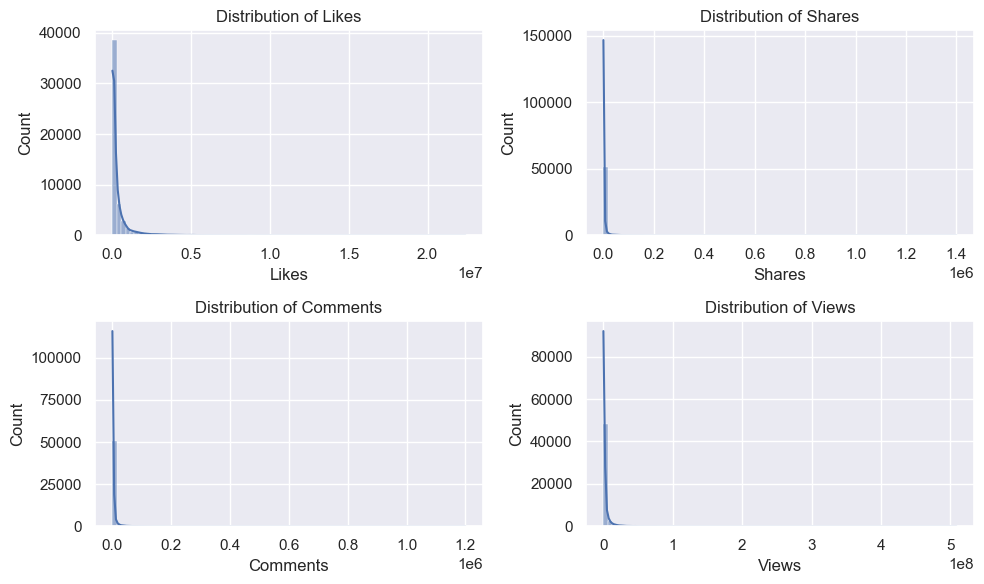

In [82]:
engagement_columns = ['Likes', 'Shares', 'Comments', 'Views']

plt.figure(figsize=(10, 6))

for i, col in enumerate(engagement_columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(clean_df[col], bins=80, kde=True)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Upon analyzing the data, it becomes apparent that the features associated with engagement, such as views, likes, comments, and shares, exhibit a notable skewness, with a concentration of values within the lower range. This skewness indicates that a significant proportion of videos receive relatively lower levels of engagement, while a smaller subset achieves higher levels of engagement.

The observed deviation from a normal distribution raises the possibility of introducing bias in certain analyses or models that assume a normal distribution or an even distribution across the engagement range. The skewed nature of the data suggests that the majority of videos may not reach the same level of engagement as a select few viral or highly engaging videos.

- Distribution of Upload Time and the Period - provide insights into temporal patterns and trends

In [83]:
clean_df['Upload Year'].value_counts()

Upload Year
2020    52156
2019      562
2017       54
2018       37
2016       32
2015        3
Name: count, dtype: int64

Upon reviewing the upload year data within the dataset, it becomes apparent that the majority of the data points are concentrated in the year 2020. In order to analyze the temporal patterns more effectively, it is prudent to focus solely on the year 2020 and examine the distribution of time within that timeframe.

BTW, it is worth noting that TikTok was initially released in 2016 and gained widespread popularity, eventually becoming the top app to download in 2018. 

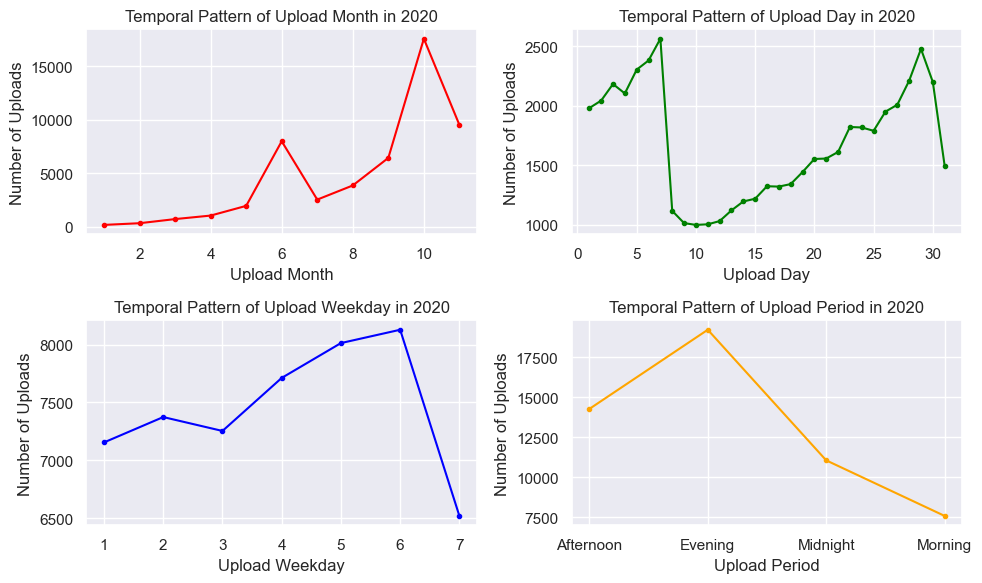

In [84]:
time_columns = ['Upload Month', 'Upload Day', 'Upload Weekday', 'Upload Period']
line_colors = ['red', 'green', 'blue', 'orange']

plt.figure(figsize=(10, 6))

for i, col in enumerate(time_columns):
    plt.subplot(2, 2, i+1)
    time_data = clean_df[clean_df['Upload Year'] == 2020].groupby(col).size()
    plt.plot(time_data.index, time_data.values, marker='.', color=line_colors[i])
    plt.xlabel(col)
    plt.ylabel('Number of Uploads')
    plt.title(f'Temporal Pattern of {col} in 2020')

plt.tight_layout()
plt.show()

Temporal Pattern of Upload Month: The analysis of the upload month reveals two prominent peaks within the year 2020, namely July and October. Interestingly, aside from these peak months, there is a gradual increase in the number of uploaded videos from January to December. This upward trend indicates a general growth in video uploads throughout the year, with the exception of the two peak months. Further investigation is required to understand the factors contributing to the specific surge in video uploads during July and October.

Temporal Pattern of Upload Day: The examination of upload days demonstrates a distinct pattern. Initially, there is a gradual increase in the number of uploaded videos during the early days of the month. However, a noticeable drop is observed, reaching its lowest point around the 10th of the month. Subsequently, the number of uploaded videos gradually rises until the latter part of the month, followed by a decline towards the end of the month. The reasons behind this observed pattern warrant further exploration and analysis.

Temporal Pattern of Upload Weekday: Analysis of the upload weekday pattern indicates a gradual increase in the number of video uploads from Monday to Saturday, with Saturday being the peak day for video uploads. However, a significant drop is observed when Sunday is reached. This trend suggests that TikTok users tend to engage in more video uploads during weekdays, peaking on Saturdays, but demonstrate reduced activity on Sundays.

Temporal Pattern of Upload Period: The analysis of the upload period reveals a preference for uploading videos in the evening, followed by the afternoon and midnight. Conversely, the morning time exhibits the lowest number of uploaded videos. This pattern suggests a temporal preference among users, with evening hours being more conducive to video creation and sharing. Further exploration can shed light on the reasons behind these temporal preferences and their potential impact on user engagement and video content.

- Distribution of Followers and Total Likes - gain a better understanding of the range and diversity of user profiles, including both influencers and regular users, within the dataset

In [85]:
user_df = clean_df[['User_ID', 'Followers', 'Total Likes', 'Total Videos']].drop_duplicates('User_ID')

user_df

,User_ID,Followers,Total Likes,Total Videos
0,6892428462015958273,1000000,4700000,211
1,6891790235336822018,1000000,4700000,211
2,6891264678832475393,1000000,4700000,211
3,6891050048403049730,1000000,4700000,211
4,6890886086613126402,1000000,4700000,211
...,...,...,...,...
52839,6876829707153820933,9100000,260100000,1418
52840,6876466118068931845,9100000,260100000,1418
52841,6876456742780275973,9100000,260100000,1418
52842,6876117050423594246,9100000,260100000,1418


In the context of TikTok, users who have amassed a follower count exceeding one million are commonly regarded as TikTok influencers. 

<Figure size 1000x800 with 0 Axes>

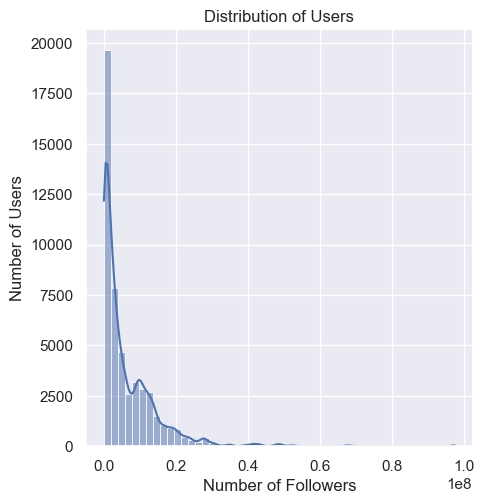

In [86]:
plt.figure(figsize=(10,8))

sns.displot(user_df, x='Followers', bins=50, kde=True)
plt.title('Distribution of Users')
plt.xlabel('Number of Followers')
plt.ylabel('Number of Users')

plt.show()

<Figure size 1000x800 with 0 Axes>

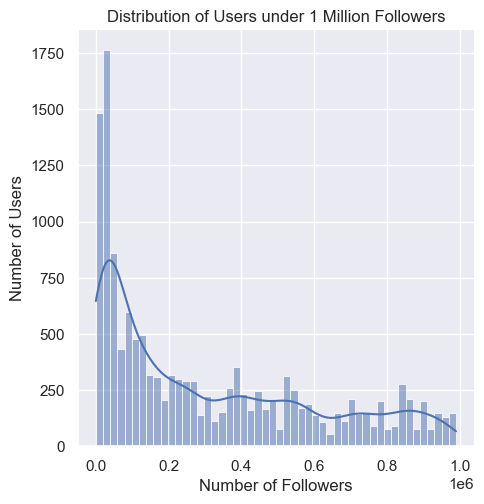

In [87]:
# focus on the users with less than 1 million followers

plt.figure(figsize=(10,8))

sns.displot(user_df[user_df['Followers'] < 1000000], x='Followers', bins=50, kde=True)
plt.title('Distribution of Users under 1 Million Followers')
plt.xlabel('Number of Followers')
plt.ylabel('Number of Users')

plt.show()

Based on the histogram above, it is evident that the dataset encompasses records for both regular users and influencers. However, a notable imbalance exists within the dataset, with a significant concentration of data points pertaining to regular users. This disparity poses potential challenges in training a model that performs equally well for both regular users and influencers. The skewed distribution of data in favor of regular users implies that the model may exhibit a bias towards this majority class during training. As a consequence, its ability to effectively capture the unique characteristics and patterns exhibited by influencers could be compromised.

#### Grouping data with duplicated meaning

After examination of the dataset, it has been discovered that the "Song Title" column contains values indicating the absence of background music in the videos. These values are expressed in multiple languages, suggesting that they all signify the usage of the original sound in the videos. To ensure consistency and facilitate analysis, I will standardize these values by replacing all language variants with the term "original sound." By treating these entries as a unified group, further analysis can be conducted to explore the characteristics and patterns associated with videos that utilize the original sound.

In [88]:
clean_df['Song Title'].value_counts()

Song Title
original sound                   23892
sonido original                   3091
оригинальный звук                  843
som original                       731
Originalton                        336
                                 ...  
Subway SUBstep                       1
The Show Goes On                     1
thank you for 4k                     1
DJ DOXY never to much remix          1
everybody wants you sept 10th        1
Name: count, Length: 7655, dtype: int64

In [89]:
song_title_ori = clean_df[clean_df['Song Title'].str.contains('ori', case=False)]['Song Title'].value_counts()

song_title_ori

Song Title
original sound                                                       23892
sonido original                                                       3091
som original                                                           731
Originalton                                                            336
Original Sound                                                         207
                                                                     ...  
original sound - ❤ S A M I R A H ❤                                       1
original sound - PRAYAS❤️                                                1
original sound - xoremchentamang                                         1
original sound - Khatri_17                                               1
Ironic (Originally Performed by Alanis Morissette) [Instrumental]        1
Name: count, Length: 1021, dtype: int64

In [90]:
# only display the song title contain 'ori' that occur more than 10 times

song_title_ori[song_title_ori > 10].reset_index()

,Song Title,count
0,original sound,23892
1,sonido original,3091
2,som original,731
3,Originalton,336
4,Original Sound,207
5,orijinal ses,190
6,son original,176
7,suono originale,66
8,Hit the Quan (Original Version),62
9,origineel geluid,55


In [91]:
# Original Sound in Multiple Languages
# Song Titles Starting with "Original Sound - Username" representing 
# the song is originally created by the user indicated in the username

orig_sounds = ['original sound', 'sonido original', 'som original', 
               'Originalton', 'Original Sound', 'orijinal ses', 
               'son original', 'оригинальный звук', 'suono originale', 
               'origineel geluid']

In [92]:
clean_df['Song Title'] = clean_df['Song Title'].replace(orig_sounds, 'original sound')

In [93]:
clean_df['Song Title'].value_counts()

Song Title
original sound                      29587
الصوت الأصلي                          316
Monkeys Spinning Monkeys              131
What You Know Bout Love               124
WAP（feat. Megan Thee Stallion）        123
                                    ...  
Try to get up                           1
LEAD THE RACE (UNDEFEATED)              1
THOT!                                   1
Blow Ya Mind - Club Caviar Remix        1
everybody wants you sept 10th           1
Name: count, Length: 7646, dtype: int64

Based on the observation, it is evident that the utilization of the original sound in video recordings constitutes more than half of the available video data. This finding suggests that the non-background music (non-BGM) type of TikTok videos holds significance within the dataset. It is important to note that this category may encompass various scenarios, including videos where users choose to use another device to play background music or videos where the usage of background audio is not explicitly indicated or marked.

#### Exploring Song Titles

Based on the observations made, it is evident that the term 'original sound' frequently appears in the dataset, predominantly due to its association with the group of videos that do not include background music. To further analyze the relationship between songs and engagement, it is essential to remove the 'original sound' value from the dataset and focus on the remaining song titles.

In [123]:
song_df = clean_df[clean_df['Song Title'] != 'original sound']

song_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28952 entries, 0 to 52842
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           28952 non-null  int64  
 1   Hashtags          28952 non-null  object 
 2   Song Title        28952 non-null  object 
 3   Video Length      28952 non-null  int64  
 4   Likes             28952 non-null  int64  
 5   Shares            28952 non-null  int64  
 6   Comments          28952 non-null  int64  
 7   Views             28952 non-null  int64  
 8   Followers         28952 non-null  int64  
 9   Total Likes       28952 non-null  int64  
 10  Total Videos      28952 non-null  int64  
 11  Upload Year       28952 non-null  int64  
 12  Upload Month      28952 non-null  int64  
 13  Upload Day        28952 non-null  int64  
 14  Upload Weekday    28952 non-null  int64  
 15  Total Engagement  28952 non-null  int64  
 16  Engagement Rate   28952 non-null  float64
 17

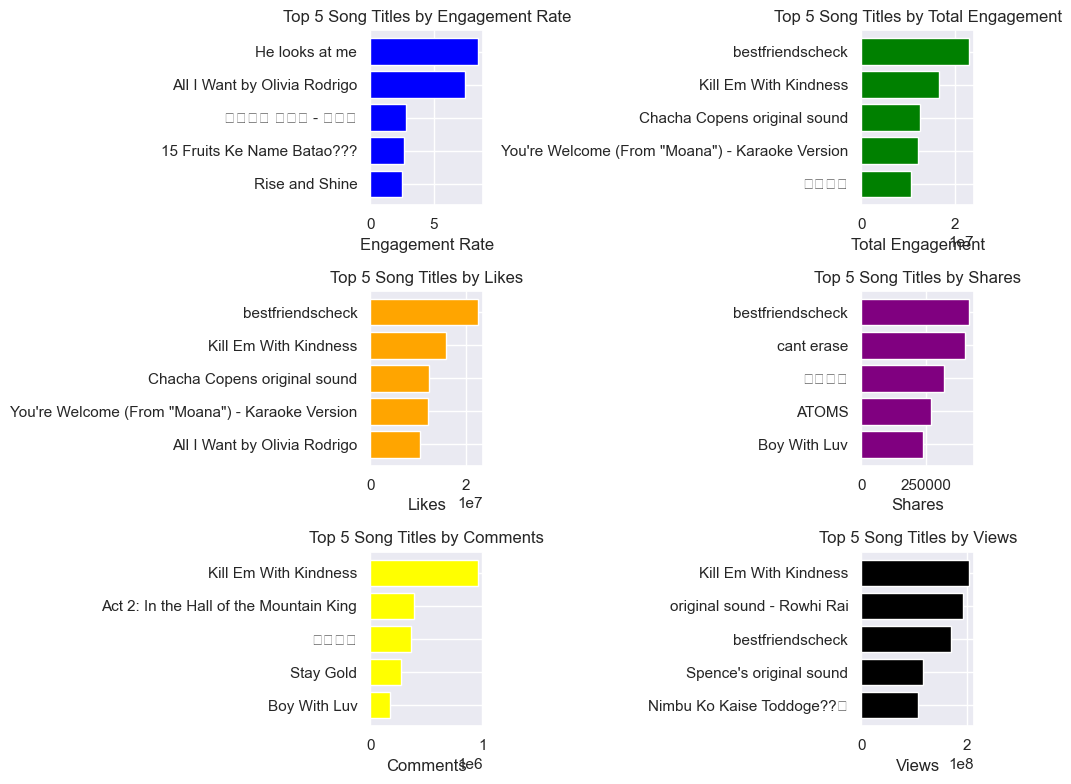

In [124]:
engagement_features = ['Engagement Rate', 'Total Engagement', 'Likes', 'Shares', 'Comments', 'Views']
colors = ['blue', 'green', 'orange', 'purple', 'yellow', 'black']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,8))
fig.subplots_adjust(hspace=0.4)

for i, feature in enumerate(engagement_features):
    
    song_group = song_df.groupby('Song Title')[feature].mean()
    top_songs = song_group.nlargest(5).sort_values()
    
    row = i // 2
    col = i % 2
    
    axes[row, col].barh(top_songs.index, top_songs.values, color=colors[i])
    axes[row, col].set_xlabel(feature)
    #axes[row, col].set_ylabel('Song Title')
    axes[row, col].set_title(f'Top 5 Song Titles by {feature}')

plt.tight_layout()
plt.show()

In [127]:
# special characters, such as Korean characters, are not displaying correctly in the plots

sorted_engagement = song_df.groupby('Song Title')['Engagement Rate'].mean().sort_values(ascending=False)

sorted_engagement.head(5)

Song Title
He looks at me                  8.479699
All I Want by Olivia Rodrigo    7.500071
오리지널 사운드 - 차서준                  2.796493
15 Fruits Ke Name Batao???      2.647083
Rise and Shine                  2.513101
Name: Engagement Rate, dtype: float64

Based on the insights derived from the above bar chart, it is interesting to observe that certain songs appear multiple times in the dataset. Notably, some songs exhibit a strong presence in the "Total Engagement" ranking, indicating their popularity based on cumulative engagement metrics such as likes, shares, comments, and views. However, these same songs may not feature prominently in the "Engagement Rate" ranking, suggesting that the number of followers has a significant influence on the overall engagement rate.

Furthermore, it is important to note that not all the songs identified in the analysis are specific to the timeframe of data collection, which spans 2020 and 2021. Some songs may be classified as classic music or popular during certain holiday seasons. This indicates that the TikTok community's preferences extend beyond the contemporary hit songs and encompasses a broader range of musical genres and time periods.

The relationship between a song's popularity on TikTok and its status as a hit song outside the platform is complex and challenging to ascertain definitively. It is possible that songs gain popularity on TikTok and subsequently become hit songs, or vice versa, where already popular songs find their way onto the TikTok platform and further enhance their reach and popularity. The interplay between TikTok trends and mainstream music trends contributes to the dynamic nature of song popularity on the platform.

#### Exploring Upload Time

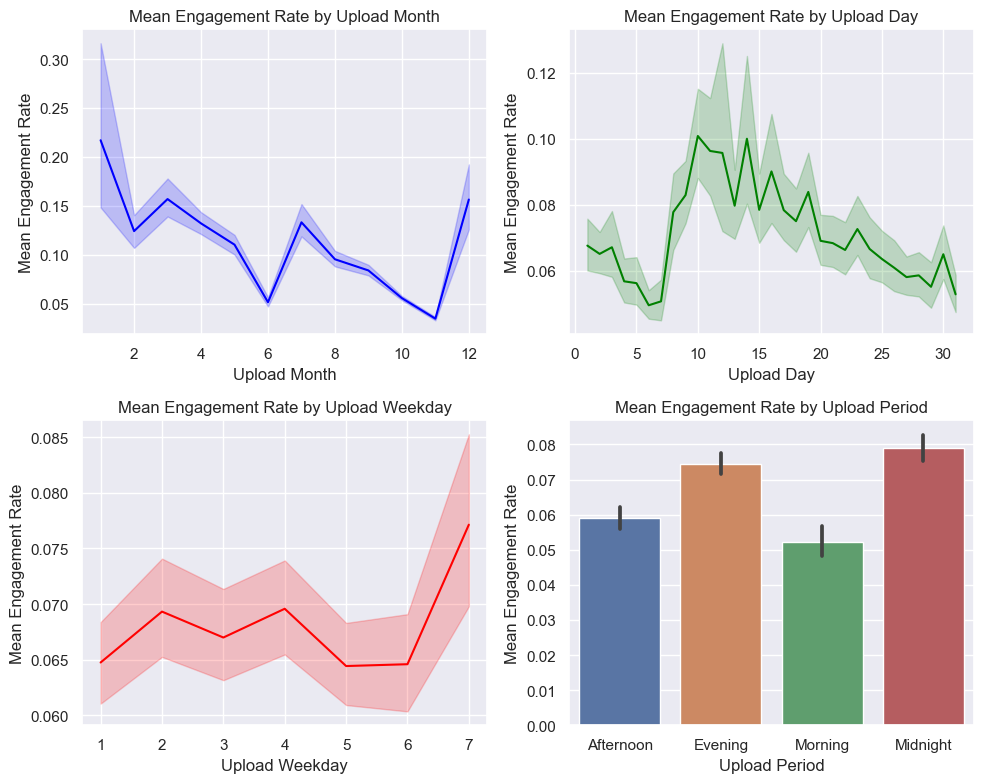

In [137]:
time_features = ['Upload Month', 'Upload Day', 'Upload Weekday']
colors = ['blue', 'green', 'red']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
fig.subplots_adjust(hspace=0.4)

# line plot for continuous data
for i, feature in enumerate(time_features):
    ax = axes[i // 2, i % 2]
    sns.lineplot(data=clean_df, x=feature, y='Engagement Rate', color=colors[i], ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel('Mean Engagement Rate')
    ax.set_title(f'Mean Engagement Rate by {feature}')

# bar plot for non-continuous data
sns.barplot(data=clean_df, x='Upload Period', y='Engagement Rate', ax=axes[1, 1])
axes[1, 1].set_xlabel('Upload Period')
axes[1, 1].set_ylabel('Mean Engagement Rate')
axes[1, 1].set_title('Mean Engagement Rate by Upload Period')

plt.tight_layout()
plt.show()

The analysis reveals intriguing insights regarding the influence of upload time on the average engagement rate of videos. Key findings include:

1. Impact of Upload Month: June and November exhibit the lowest engagement rates, while January stands out with the highest engagement rate. This suggests that videos uploaded in January tend to receive a higher level of user engagement compared to those uploaded in June or November.

2. Effect of Upload Day within the Month: The middle days of the month demonstrate higher engagement rates compared to the early or late days. This indicates that videos uploaded during the middle period of the month are more likely to attract user engagement and interaction.

3. Engagement Rate by Weekday: Surprisingly, Sunday records the highest engagement rate, whereas Friday and Saturday have the lowest engagement rates. This finding is intriguing as Sunday has the fewest video uploads, yet users appear to be more inclined to interact and watch videos on this particular day. Conversely, although users tend to post videos on Saturdays, these videos tend to have lower engagement rates.

4. Influence of Upload Period: The analysis indicates that videos uploaded during midnight hours observe the highest engagement rate, followed by the evening, afternoon, and morning periods. This aligns with expectations, as users typically have more leisure time to watch videos in the evening and night, compared to the morning and afternoon when they may be engaged in other activities.

In [ ]:
#### Exploring Hashtags

In [ ]:
#### Exploring Video Length

#### Engagement Column Correlation

In [102]:
dummy_df = pd.get_dummies(clean_df['Upload Period'], prefix='Upload', dtype='int')

clean_df = pd.concat([clean_df, dummy_df], axis=1)

clean_df.head()

,User_ID,Hashtags,Song Title,Video Length,Likes,Shares,Comments,Views,Followers,Total Likes,...,Upload Month,Upload Day,Upload Weekday,Upload Period,Total Engagement,Engagement Rate,Upload_Afternoon,Upload_Evening,Upload_Midnight,Upload_Morning
0,6892428462015958273,"['johncena', 'love', 'tiktok', 'fyp', 'foryoup...",الصوت الأصلي,8,1984,3,18,12800,1000000,4700000,...,11,7,6,Afternoon,2005,0.002005,1,0,0,0
1,6891790235336822018,"['johncena', 'love', 'tiktok', 'halloween', 'q...",الصوت الأصلي,6,7372,9,51,52800,1000000,4700000,...,11,5,4,Evening,7432,0.007432,0,1,0,0
2,6891264678832475393,"['johncena', 'love', 'fyp', 'foryoupage']",The Time Is Now (John Cena),5,4623,11,27,37700,1000000,4700000,...,11,4,3,Afternoon,4661,0.004661,1,0,0,0
3,6891050048403049730,"['johncena', 'fyp', 'foryoupage', 'viral', 'co...",الصوت الأصلي,6,7931,6,24,51200,1000000,4700000,...,11,3,2,Evening,7961,0.007961,0,1,0,0
4,6890886086613126402,"['johncena', 'foryoupage', 'fyp', 'viral']",الصوت الأصلي,15,3229,9,14,24700,1000000,4700000,...,11,3,2,Afternoon,3252,0.003252,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52839,6876829707153820933,['sarati'],WAP（feat. Megan Thee Stallion）,10,99700,296,343,628400,9100000,260100000,...,9,26,6,Afternoon,100339,0.011026,1,0,0,0
52840,6876466118068931845,['sarati'],Daisy (I’m Crazy But You Like That),9,81200,140,639,516800,9100000,260100000,...,9,25,5,Afternoon,81979,0.009009,1,0,0,0
52841,6876456742780275973,['sarati'],original sound,59,82300,247,674,500700,9100000,260100000,...,9,25,5,Afternoon,83221,0.009145,1,0,0,0
52842,6876117050423594246,['sarati'],Goodbye (feat. Lyse) [Slow Version],8,99000,407,427,776300,9100000,260100000,...,9,24,4,Evening,99834,0.010971,0,1,0,0


In [104]:
clean_df = clean_df.drop('Upload Period', axis=1)

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52844 entries, 0 to 52843
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           52844 non-null  int64  
 1   Hashtags          52844 non-null  object 
 2   Song Title        52844 non-null  object 
 3   Video Length      52844 non-null  int64  
 4   Likes             52844 non-null  int64  
 5   Shares            52844 non-null  int64  
 6   Comments          52844 non-null  int64  
 7   Views             52844 non-null  int64  
 8   Followers         52844 non-null  int64  
 9   Total Likes       52844 non-null  int64  
 10  Total Videos      52844 non-null  int64  
 11  Upload Year       52844 non-null  int64  
 12  Upload Month      52844 non-null  int64  
 13  Upload Day        52844 non-null  int64  
 14  Upload Weekday    52844 non-null  int64  
 15  Total Engagement  52844 non-null  int64  
 16  Engagement Rate   52844 non-null  float6

In [105]:
numeric_df = clean_df.copy()

numeric_df = numeric_df.drop(['Hashtags', 'Song Title'], axis=1)

In [106]:
X = numeric_df.drop('Engagement Rate', axis=1)
y = numeric_df['Engagement Rate'].copy()

In [107]:
X.corr()

,User_ID,Video Length,Likes,Shares,Comments,Views,Followers,Total Likes,Total Videos,Upload Year,Upload Month,Upload Day,Upload Weekday,Total Engagement,Upload_Afternoon,Upload_Evening,Upload_Midnight,Upload_Morning
User_ID,1.000000,0.011318,-0.020152,-0.008503,-0.026243,-0.029598,0.015180,0.029676,0.043540,0.799821,0.140958,-0.011013,-0.006249,-0.020355,0.013241,0.012333,-0.008835,-0.023324
Video Length,0.011318,1.000000,-0.006279,0.014637,-0.010003,-0.021415,-0.031391,-0.041222,-0.027166,0.002599,-0.009451,-0.001117,-0.013781,-0.006036,-0.003942,0.011271,0.005133,-0.016370
Likes,-0.020152,-0.006279,1.000000,0.630997,0.576278,0.835602,0.471758,0.351872,-0.018079,-0.066243,-0.058718,0.004078,0.006021,0.999693,-0.054211,0.076538,0.031965,-0.073186
Shares,-0.008503,0.014637,0.630997,1.000000,0.504672,0.585761,0.187448,0.131392,-0.026770,-0.060076,-0.069233,0.007292,0.003423,0.645536,-0.018048,0.014046,0.016584,-0.015628
Comments,-0.026243,-0.010003,0.576278,0.504672,1.000000,0.580293,0.270723,0.243867,-0.004867,-0.042049,-0.012587,-0.007799,-0.002159,0.592233,-0.039215,0.040516,0.026012,-0.036001
Views,-0.029598,-0.021415,0.835602,0.585761,0.580293,1.000000,0.364658,0.237333,-0.030040,-0.083793,-0.112864,0.008449,0.000164,0.838476,-0.020415,0.034960,0.018117,-0.042990
Followers,0.015180,-0.031391,0.471758,0.187448,0.270723,0.364658,1.000000,0.818261,0.384827,-0.021467,0.042224,0.026807,0.001361,0.469408,-0.035789,0.080092,-0.012351,-0.049945
Total Likes,0.029676,-0.041222,0.351872,0.131392,0.243867,0.237333,0.818261,1.000000,0.525748,0.033275,0.108178,0.013877,0.004144,0.350790,-0.048281,0.092435,-0.009024,-0.054898
Total Videos,0.043540,-0.027166,-0.018079,-0.026770,-0.004867,-0.030040,0.384827,0.525748,1.000000,0.067816,0.105049,0.015820,0.014397,-0.018267,0.011052,-0.003951,-0.041069,0.039036
Upload Year,0.799821,0.002599,-0.066243,-0.060076,-0.042049,-0.083793,-0.021467,0.033275,0.067816,1.000000,0.021569,-0.010223,0.000408,-0.066662,0.017665,0.000780,-0.010381,-0.011332


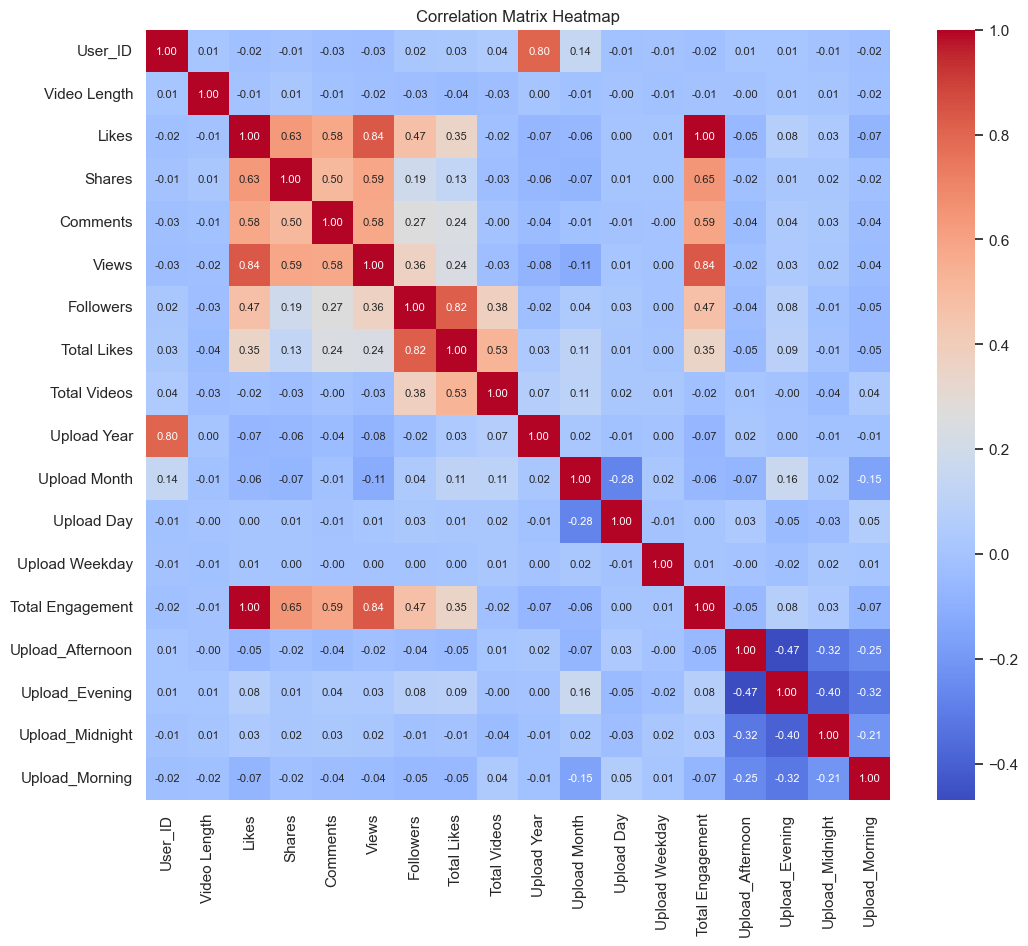

In [110]:
plt.figure(figsize=(12,10))

sns.heatmap(X.corr(), annot=True, fmt=".2f", annot_kws={"size": 8}, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')

plt.show()

Based on the analysis of the heatmap, several key observations can be made:

1. High correlations: The heatmap reveals strong positive correlations between the `Views` feature and the `Likes`, `Shares`, and `Comments` features. This indicates that videos with higher views tend to have a higher likelihood of receiving more likes, shares, and comments.

2. Relationship between Followers and Total Likes: The heatmap highlights a significant correlation between the `Followers` and `Total Likes` features. This suggests that users with a larger follower base tend to accumulate a higher number of likes.

3. Relationship between Followers and Views/Likes/Shares/Comments: The heatmap reveals that the relationship between `Followers` and `Views`, `Likes`, `Shares`, and `Comments` is not as strong as initially expected. This implies that while follower count may influence engagement levels, it is not the sole determining factor. Other variables or factors likely contribute to the engagement metrics.

4. Multicollinearity of Upload Period: The heatmap shows evidence of multicollinearity among the different upload periods. This suggests that the upload periods are highly correlated with each other, potentially sharing similar characteristics or trends.

5. Multicollinearity of Upload Day and Upload Month: Similarly, the heatmap indicates multicollinearity between the upload day and upload month variables. This implies that these two temporal variables share common patterns or trends, and their impact on the dependent variables may be intertwined.